# `depth_est_ml_mqtt` Testing Notebook


In [4]:
import matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd
from pathlib import Path
import json
import yaml
import os
from itertools import dropwhile

#====================================================================
# Import the main functions from the uos_depth_est_core.py module
#====================================================================

from abyss.uos_depth_est_core import (
    depth_est_ml,
    depth_est_ml_mqtt,
    convert_mqtt_to_df,
    DepthInference,
    )

In [5]:
with open (f'{os.getcwd()}\\data\\data0\\Result.json') as f:
    d0 = json.load(f)
with open (f'{os.getcwd()}\\data\\data0\\Trace.json') as f:
    d1 = json.load(f)
with open (f'{os.getcwd()}\\mqtt_conf.yaml') as file:
    config = yaml.safe_load(file)['mqtt']

In [6]:
def get_value_iteritems(data, key) -> str:
    """Get some value from nested dictionary"""
    for k, v in data.items():
        # print(k)
        # print(v)
        if k == key:
            return v
        break
    else:
        print ("Key not found")
        return None

In [7]:
def nested_key_exists(d, keys):
    if keys and d:
        return nested_key_exists(d.get(keys[0]), keys[1:])
    return not keys and d is not None

In [8]:
get_value_iteritems(d0, 'SourceTimestamp')

In [9]:
type(d0)

dict

In [14]:
df = pd.read_csv(f'{os.getcwd()}\\..\\run\\1737046216.0.csv')

<Axes: >

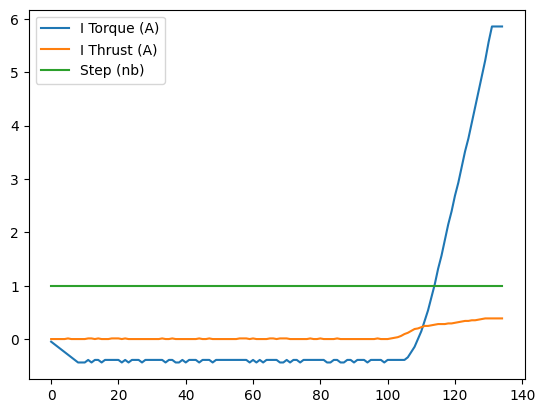

In [19]:
df[['I Torque (A)', 'I Thrust (A)', 'Step (nb)']].plot()

In [15]:
di = DepthInference()
di.infer_common(df)

C:\Users\windo\Documents\github\uos-drilling-wh\abyss\src\abyss/trained_model/has_tool_age_predrilling/cv4


KeyError: 'local'

In [35]:
temp = 'SourceTimestamp'

res = []
# iterating over each value in dictionary
for key in d0.keys():
     
    # checking if key exists in current value
    if temp == key:
         
        # appending value of key to the result list
        res.append(d0[temp])

print(res)

[]


In [36]:
def find_in_dict(data: dict, target_key: str) -> list:
    """
    Recursively search for a key in a nested dictionary.
    Returns list of values found for that key.
    """
    results = []
    
    def _search(current_dict):
        for key, value in current_dict.items():
            if key == target_key:
                results.append(value)
            if isinstance(value, dict):
                _search(value)
    
    _search(data)
    return results

# Example usage
nested_dict = {
    "user": {
        "id": "123",
        "profile": {
            "name": "John",
            "settings": {
                "name": "dark theme"
            }
        }
    },
    "name": "root"
}

# Find all values for key "name"
values = find_in_dict(nested_dict, "name")
print(values)  # ['dark theme', 'John', 'root']

['John', 'dark theme', 'root']


In [46]:
import datetime

datetime.datetime.strptime('2021-09-01T12:00:00.000Z', '%Y-%m-%dT%H:%M:%S.%fZ')

datetime.datetime(2021, 9, 1, 12, 0)

In [ ]:
import datetime

datetime.strptime('2024-12-20T09:38:18Z', "%Y-%m-%dT%H:%M:%SZ")

st = '2024-12-20T09:38:18Z'

dt = datetime.strptime(st, "%Y-%m-%dT%H:%M:%SZ")

AttributeError: module 'datetime' has no attribute 'strptime'

In [37]:
# Find all values for key ""
values = find_in_dict(d0, temp)
print(values)  # ['dark theme', 'John', 'root']

['2024-12-11T08:24:49Z', '2024-12-11T08:24:49Z', '2024-12-11T08:24:49Z', '2024-12-11T08:24:49Z', '2024-12-11T08:24:49Z', '2024-12-11T08:24:49Z', '2024-12-11T08:24:49Z', '2024-12-11T08:24:49Z', '2024-12-11T08:24:49Z', '2024-12-11T08:24:49Z', '2024-12-11T08:24:49Z', '2024-12-11T08:24:49Z', '2024-12-11T08:24:49Z', '2024-12-11T08:24:49Z', '2024-12-11T08:24:49Z', '2024-12-11T08:24:49Z', '2024-12-11T08:24:49Z', '2024-12-11T08:24:49Z', '2024-12-11T08:24:49Z']


In [39]:
type(values)

list

In [41]:
assert(len(set(values)))

In [25]:
keys = list(d0['Messages']['Payload'].keys())

# keys[0].split('=')[-1].split('.')[-1] # getting the important bit in the payload key

# [k.split('=')[-1].split('.')[-1] for k in keys] # getting the last item in the key chain

lk = keys[0].split('=')[-1].split('.')
print(lk)


['Objects', 'DeviceSet', 'E0025C6395081C56_A4HL-LG_ST_13_16', 'ResultManagement', 'Results', '0', 'ResultMetaData', 'CreationTime']


In [42]:
# [k.split('=')[-1].split('.') for k in keys]
keys0 = list(d0['Messages']['Payload'].keys())

[k.split('=')[-1].split('.')[-1] for k in keys0]

['CreationTime',
 'SerialNumber',
 'InternalRecipeType',
 'InternalRecipeId',
 'InternalRecipeVersion',
 'IntensityTorqueEmpty',
 'IntensityThrustEmpty',
 'StopCode',
 'CycleTime',
 'ResultId',
 'ResultEvaluation',
 'Distance',
 'StepNumber',
 'M1MaxAmperage',
 'M2MaxAmperage',
 'M1Distance',
 'M2Distance',
 'GapMax',
 'Duration']

In [45]:
# [k.split('=')[-1].split('.') for k in keys]
keys1 = list(d1['Messages']['Payload'].keys())

[k.split('=')[-1].split('.')[-1] for k in keys1]

['StepResultId',
 'SamplingInterval',
 'Values',
 'StepResultId',
 'SamplingInterval',
 'Values',
 'StepResultId',
 'SamplingInterval',
 'Values',
 'StepResultId',
 'SamplingInterval',
 'Values',
 'StepResultId',
 'SamplingInterval',
 'StepResultId',
 'SamplingInterval',
 'Values']

In [36]:
import itertools

list(itertools.dropwhile(lambda x: x != 'DeviceSet', lk))[1]
# list(itertools.dropwhile(lambda x: x<5, [1,4,6,3,8]))

'E0025C6395081C56_A4HL-LG_ST_13_16'

In [2]:
hole_id_keys = ('Messages', 'Payload', 'nsu=http://airbus.com/IJT/ADrilling;s=Objects.DeviceSet.setitecxls.ResultManagement.Results.0.ResultMetaData.SerialNumber','Value')
position_keys = ('Messages', 'Payload', 'nsu=http://airbus.com/IJT/ADrilling;s=Objects.DeviceSet.setitecxls.ResultManagement.Results.0.ResultContent.StepResults.0.StepResultValues.Position','Value')
torque_keys = ('Messages', 'Payload', 'nsu=http://airbus.com/IJT/ADrilling;s=Objects.DeviceSet.setitecxls.ResultManagement.Results.0.ResultContent.StepResults.0.StepResultValues.Torque','Value')
torque_empty_keys = ('Messages', 'Payload', 'nsu=http://airbus.com/IJT/ADrilling;s=Objects.DeviceSet.setitecxls.ResultManagement.Results.0.ResultContent.StepResults.0.StepResultValues.TorqueEmpty','Value')
step_keys = ('Messages', 'Payload', 'nsu=http://airbus.com/IJT/ADrilling;s=Objects.DeviceSet.setitecxls.ResultManagement.Results.0.ResultContent.StepResults.0.StepResultValues.StepNb','Value')
local_keys = ('Messages', 'Payload', 'nsu=http://airbus.com/IJT/ADrilling;s=Objects.DeviceSet.setitecxls.ResultManagement.Results.0.ResultMetaData.ToolAge','Value')
predrilled_keys = ('Messages', 'Payload', 'nsu=http://airbus.com/IJT/ADrilling;s=Objects.DeviceSet.setitecxls.ResultManagement.Results.0.ResultMetaData.Predrilled','Value')


In [3]:
from functools import reduce
with open ('./data/data-wh.json') as f:
    d = json.load(f)
    position = reduce(dict.get, position_keys, d)
    torque = reduce(dict.get, torque_keys, d)
    torque_empty = reduce(dict.get, torque_empty_keys, d)
    step = reduce(dict.get, step_keys, d)
    print(step)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

In [4]:
with open('./data/data-wh.json') as f:
    d = json.load(f)
    # https://stackoverflow.com/questions/34209587/python-access-hierarchical-dict-element-from-list-of-keys
    position = reduce(dict.get, position_keys, d)
    torque = reduce(dict.get, torque_keys, d)
    torque_empty = reduce(dict.get, torque_empty_keys, d)
    step = reduce(dict.get, step_keys, d)
    hole_id = reduce(dict.get, hole_id_keys, d)
    local = 0 #reduce(dict.get, local_keys, d)
    predrilled = 1 #reduce(dict.get, predrilled_keys, d)
    # df = pd.DataFrame({'Position': position, 'Torque': torque, 'Torque_Empty': torque_empty})
    df = pd.DataFrame({'Position (mm)': position, 
                       'I Torque (A)': torque, 
                       'I Torque Empty (A)': torque_empty, 
                       'Step (nb)': step})
    #Expected columns: 'i_torque', 'HOLE_ID', 'step', 'xpos', 'local', 'PREDRILLED'
    df['i_torque'] = df['I Torque (A)'] + df['I Torque Empty (A)']
    df=df.astype({'Step (nb)': 'int32'})
    df['Position (mm)'] = -df['Position (mm)']
    df['HOLE_ID'] = str(hole_id)
    df['local'] = local
    df['PREDRILLED'] = predrilled

    df = df.convert_dtypes()

df.dtypes

Position (mm)                Float64
I Torque (A)                 Float64
I Torque Empty (A)           Float64
Step (nb)                      Int32
i_torque                     Float64
HOLE_ID               string[python]
local                          Int64
PREDRILLED                     Int64
dtype: object

<Axes: >

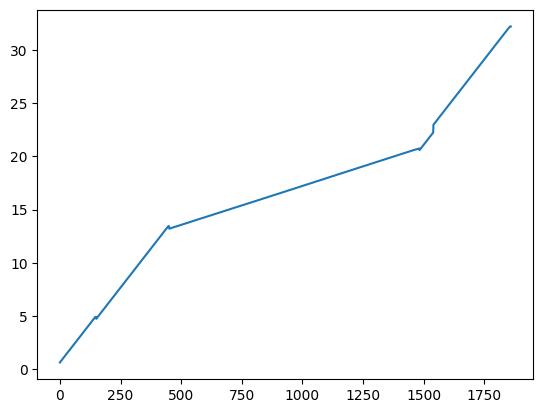

In [5]:
df['Position (mm)'].plot()

In [6]:
import plotly.express as px
px.line(df, x='Position (mm)', y=['i_torque', 'Step (nb)'],  title='Torque vs Position')

In [7]:
from abyss.uos_depth_est_core import convert_mqtt_to_df

with open ('./data/data-wh.json') as f:
    d = f.read()
    df = convert_mqtt_to_df(d)
df.dtypes

Position (mm)         float64
I Torque (A)          float64
I Torque Empty (A)    float64
Step (nb)               int32
HOLE_ID                object
local                   int64
PREDRILLED              int64
dtype: object

In [8]:
import paho.mqtt.client as mqtt

In [9]:
with open ('./data/data-wh.json') as f:
    d = f.read()
    depth = depth_est_ml_mqtt(d)
    print(depth)

C:\Users\windo\Documents\github\uos-drilling-wh\abyss\src\abyss/trained_model/has_tool_age_predrilling/cv4


100%|██████████| 1/1 [00:00<00:00, 333.36it/s]


C:\Users\windo\Documents\github\uos-drilling-wh\abyss\src\abyss/trained_model/has_tool_age_predrilling/cv4


100%|██████████| 40/40 [00:01<00:00, 27.54it/s]

(4.805, 17.732850122451783)
